In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

#loading ds

In [0]:
dataset_train = pd.read_csv('bitcoin_price_Training - Training.csv')
training_set = dataset_train.iloc[:, 2:3]


In [29]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

#creating data with timesteps

In [0]:
X_train = []
y_train = []
for i in range(60, 1555):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [31]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1495/1495 [==============================] - 13s 8ms/step - loss: 0.0056
Epoch 2/100
1495/1495 [==============================] - 8s 6ms/step - loss: 0.0016
Epoch 3/100
1495/1495 [==============================] - 9s 6ms/step - loss: 0.0012
Epoch 4/100
1495/1495 [==============================] - 9s 6ms/step - loss: 0.0011
Epoch 5/100
1495/1495 [==============================] - 8s 6ms/step - loss: 0.0011
Epoch 6/100
1495/1495 [==============================] - 8s 6ms/step - loss: 0.0012
Epoch 7/100
1495/1495 [==============================] - 8s 6ms/step - loss: 8.9049e-04
Epoch 8/100
1495/1495 [==============================] - 8s 6ms/step - loss: 9.5573e-04
Epoch 9/100
 928/1495 [=================>............] - ETA: 3s - loss: 9.7599e-04

KeyboardInterrupt: ignored

#prediction

In [0]:

dataset_test = pd.read_csv('bitcoin_price_1week_Test - Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [0]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 68 ):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

#plotting part

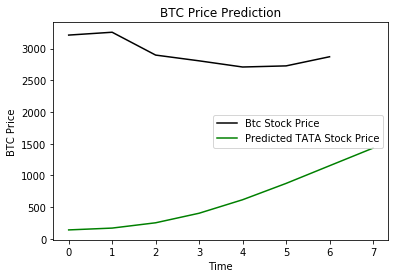

In [46]:
plt.plot(real_stock_price, color = 'black', label = 'Btc Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('BTC Price Prediction')
plt.xlabel('Time')
plt.ylabel('BTC Price')
plt.legend()
plt.show()